In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Internally Generated Plots

In [14]:
u = np.linspace(-1,1,200) # default
# fx = 4+cos(3*u)+sin(2*u) # default

# this is the involute calculation for a 40 tooth gear
u1_min3 = 0
u1_max3 = 0.4986
u1_step3 = 10
u1_3 = np.linspace(u1_min3,u1_max3,u1_step3)
x = 18.7939 * (np.cos(u1_3) + u1_3 * np.sin(u1_3))
y = 18.7939 * (np.sin(u1_3) - u1_3 * np.cos(u1_3))


### Extract Coordinates from External Script

In [4]:
# paste this code into script to extract/export coordinate data.
# this code is not meant to be executed in this script

# this data is reliant on external .txt files to save coordinates too
# change paths as required
read_data_x = open("C:\\Users\chris\ChrisdeMontigny\\Nefari0 Repository\Python\Blender\coord_data_x.txt","w")
read_data_y = open("C:\\Users\chris\ChrisdeMontigny\\Nefari0 Repository\Python\Blender\coord_data_y.txt","w")
read_data_z = open("C:\\Users\chris\ChrisdeMontigny\\Nefari0 Repository\Python\Blender\coord_data_z.txt","w")

for i in range(len(x)):
    y_list = read_data_y.write(str(y[i]) + ',')
    x_list = read_data_x.write(str(x[i]) + ',')
    z_list = read_data_z.write(str(z[i]) + ',')
read_data_y.close()
read_data_x.close()
read_data_z.close()


In [ ]:
print()

### Import Data Coordinate Vectors

In [7]:
# This cell will import data from external scripts via a .txt file for each coordinate vector

# x axis data
read_data_x = open("coord_data_x.txt","r")
x_list = read_data_x.read()
read_data_x.close()
data_vector_x = list(x_list.split(','))

# y / u / fx axis data
read_data_y = open("coord_data_y.txt","r")
y_list = read_data_y.read()
read_data_y.close()
data_vector_y = list(y_list.split(','))

# z axis data
read_data_z = open("coord_data_z.txt","r")
z_list = read_data_z.read()
data_vector_z = list(z_list.split(','))

# convert imported plots from strings into floats
# xyz coordinates
x = []
y = []
z = []
for i in range(len(data_vector_x)-1):
    x.append(float(data_vector_x[i]))
    y.append(float(data_vector_y[i]))
    z.append(float(data_vector_z[i]))


### Coordinate Testing

In [15]:
# testing / experimental
print(y)

[0.         0.00106486 0.00851102 0.02868063 0.06783764 0.13212926
 0.22754778 0.35989323 0.5347369  0.75738588]


### Calculate and Export Plots

>['<18.7939<', '<0.0<', '<0<']>>['<18.8227186176212<', '<0.0010648578906716144<', '<0<']>>['<18.90890914624056<', '<0.008511021290507648<', '<0<']>>['<19.05167697002892<', '<0.02868062520523285<', '<0<']>>['<19.249702246453555<', '<0.0678376439337713<', '<0<']>>['<19.50114666167366<', '<0.1321292607273673<', '<0<']>>['<19.80366284741993<', '<0.22754777540109491<', '<0<']>>['<20.154406418876736<', '<0.35989322578595173<', '<0<']>>['<20.550050581793805<', '<0.5347368959872805<', '<0<']>>['<20.986803245966822<', '<0.7573858807833217<', '<0<']>


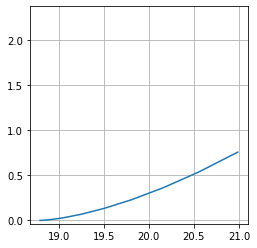

In [16]:
# This cell converts the plots imported/generated above into an xyz matrix.
# This is the format Blender will use to construct the geometry
# Two matrices are generated, one as a string and one as numeric. The string
# is then saved to an external .txt file

# ---- x / u coordinate declarations ---- #
# u = np.linspace(-4,4,200) # linear
# u = np.linspace(0,2*np.pi,200) # circular

#  ---- y / fx coordinate declarations ---- #
# default # example function
# fx = 4+np.cos(3*u)+np.sin(2*u)
    
# this displays how the Blender geometry will look when the generated mesh
# array (shown below) is executed in the bpy api in Blender.
plt.plot(x,y)

# this generates an array of arrays that contain 3 elements each. Each
# of the 3 element arrays contains an x,y,z coordinate (x[i],y[i],z=0/z[i]).
# these coordinates are converted into strings for exportation
mesh = []
mesh_string = ''
for i in range(len(x)):
    
#     string coordinates
    xyz_str = []
    xyz_str.append('<' + str(x[i]) + '<')
    xyz_str.append('<' + str(y[i]) + '<')
#     xyz_str.append('<' + str(z[i]) + '<') # uncomment if there are non-zero z coordinates
    xyz_str.append('<' + str(0) + '<') # comment out if there are non-zero z coordinates
    mesh_string += '>' + str(xyz_str) + '>'
    
#     numerical coordindats
    xyz = []
    xyz.append(x[i])
    xyz.append(y[i]) 
#     xyz.append(z[i])
    xyz.append(0)
    mesh.append(xyz)
    
print(mesh_string)

# -- this set of code saves the 'mesh' array into a text file -- #
save_mesh = open("mesh_data.txt","w")
save_mesh.write(mesh_string)
save_mesh.close()
# ------------------------------------------------------------- #

plt.axis('square')
# plt.axis([])
plt.grid()
plt.show()

[[18.7939, 0.0, 0], [18.8227186176212, 0.0010648578906716144, 0], [18.90890914624056, 0.008511021290507648, 0], [19.05167697002892, 0.02868062520523285, 0], [19.249702246453555, 0.0678376439337713, 0], [19.50114666167366, 0.1321292607273673, 0], [19.80366284741993, 0.22754777540109491, 0], [20.154406418876736, 0.35989322578595173, 0], [20.550050581793805, 0.5347368959872805, 0], [20.986803245966822, 0.7573858807833217, 0]]


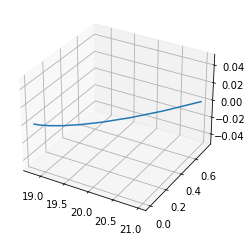

In [22]:
# 3d plot 
print(mesh)
fig = plt.figure()
ax = plt.axes(projection = '3d')
# ax.plot3D(x,y,z) # default
ax.plot3D(x,y)
plt.show()


### Prototype Import Plots

In [ ]:
# this cell opens to saved .txt file from cell above and converts it
# back into a list of lists of numbers
# This is the code block that will be used to import 
# data from this calculation , to the python script in blender that
# generates geometry

read_mesh = open("C:\\Users\chris\ChrisdeMontigny\\Nefari0 Repository\Python\Blender\mesh_data.txt","r")
is_read = read_mesh.read()
read_mesh.close()

read_list = list(is_read.split('>>')) # converts to python array
# list_index = read_list.split('<')
new_coords = []

# print(read_list[199])

for i in range(len(read_list)-1):
    list_index = read_list[i].split('<') # converts each array element into floats, stores in new_coord array
    coords = [float(list_index[1]),float(list_index[3]),float(list_index[5])]
    new_coords.append(coords)
    
print(new_coords)


In [ ]:
# experimental

# print(new_coords)

for i in new_coords:
    plt.plot(i[0],i[1],'ro')

In [ ]:
# experimental
for i in new_coords:
    print(i[0])

In [ ]:
# experimental
# print(type(new_coords[0][1]))
math1 = new_coords[0][1]
math2 = new_coords[1][0]
print(math1,math2)
print(math1+math2)